In [1]:
#import
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('lr', LinearRegression())])

In [23]:
#Import Iris Dataset
iris_data = datasets.load_iris()
df_iris = pd. DataFrame(iris_data. data, columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


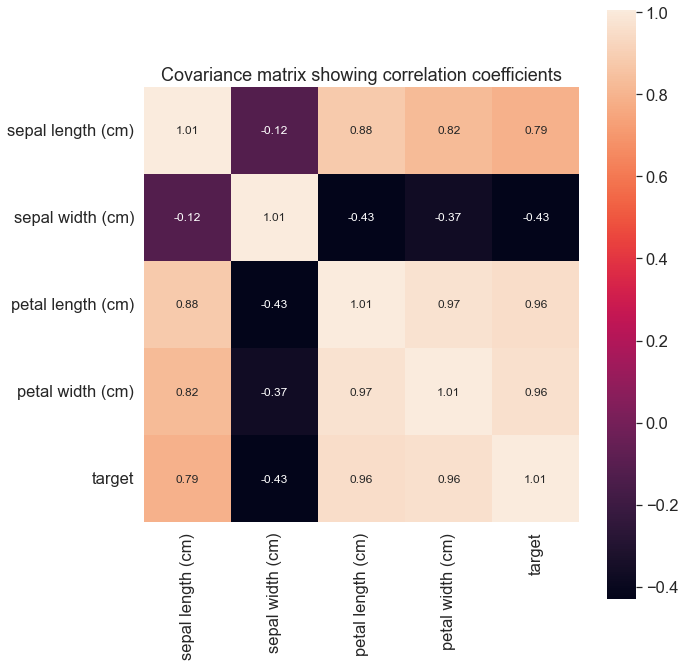

In [24]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

stdsc = StandardScaler()
X_std = stdsc.fit_transform(df_iris[cols].iloc[:,range(0,5)].values)
cov_mat = np.cov(X_std.T)
                            
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64
Formulan är  
0.7742 x - 3.524
0.6124020815321118
0.6124020815321118


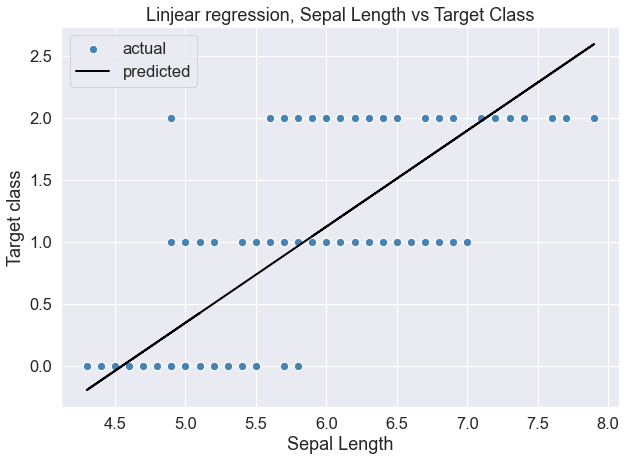

In [43]:
X = df_iris['sepal length (cm)']
y = df_iris['target']
print(X)

z = np.polyfit(X,y,1)
p = np.poly1d(z)
print(f"Formulan är {p}")

y_pred_numpy = p(X)
R2_numpy = 1 - ((y-y_pred_numpy)**2).sum()/((y-y.mean())**2).sum()
print(R2_numpy)

print(r2_score(y, y_pred_numpy))


plt.figure(figsize=(10,7))
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70, 
             label='actual')
plt.plot(X,y_pred_numpy, color='black', lw=2, label='predicted')
plt.xlabel('Sepal Length')
plt.ylabel('Target class')
plt.title('Linjear regression, Sepal Length vs Target Class')
plt.legend()
plt.show()